In [2]:
import requests
import seaborn as sns
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


CLIENT_ID = 'b4d9b57de41f4055bc1975da134632a6'
CLIENT_SECRET = 'b00d88040f354686846899e0a3e72b0c'

In [3]:
AUTH_URL = 'https://accounts.spotify.com/api/token'

# POST
auth_response = requests.post(AUTH_URL, {
    'grant_type': 'client_credentials',
    'client_id': CLIENT_ID,
    'client_secret': CLIENT_SECRET,
})

# convert the response to JSON
auth_response_data = auth_response.json()

# save the access token
access_token = auth_response_data['access_token']

In [4]:
headers = {
    'Authorization': 'Bearer {token}'.format(token=access_token)
}

In [5]:
# base URL of all Spotify API endpoints
BASE_URL = 'https://api.spotify.com/v1/'

# Track ID from the URI
track_id = '5fHrHoJKfCgBd35zwIBmUK'

# actual GET request with proper header
r = requests.get(BASE_URL + 'audio-features/' + track_id, headers=headers)

In [6]:
r = r.json()
r

{'danceability': 0.718,
 'energy': 0.706,
 'key': 1,
 'loudness': -5.709,
 'mode': 1,
 'speechiness': 0.06,
 'acousticness': 0.0128,
 'instrumentalness': 0,
 'liveness': 0.352,
 'valence': 0.815,
 'tempo': 170.004,
 'type': 'audio_features',
 'id': '5fHrHoJKfCgBd35zwIBmUK',
 'uri': 'spotify:track:5fHrHoJKfCgBd35zwIBmUK',
 'track_href': 'https://api.spotify.com/v1/tracks/5fHrHoJKfCgBd35zwIBmUK',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5fHrHoJKfCgBd35zwIBmUK',
 'duration_ms': 189176,
 'time_signature': 4}

In [7]:
artist_id = '3TVXtAsR1Inumwj472S9r4'

# pull all artists albums
r = requests.get(BASE_URL + 'artists/' + artist_id + '/albums', 
                 headers=headers, 
                 params={'include_groups': 'album', 'limit': 50})
d = r.json()

In [8]:
d

{'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4/albums?offset=0&limit=50&include_groups=album',
 'items': [{'album_group': 'album',
   'album_type': 'album',
   'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3TVXtAsR1Inumwj472S9r4'},
     'href': 'https://api.spotify.com/v1/artists/3TVXtAsR1Inumwj472S9r4',
     'id': '3TVXtAsR1Inumwj472S9r4',
     'name': 'Drake',
     'type': 'artist',
     'uri': 'spotify:artist:3TVXtAsR1Inumwj472S9r4'}],
   'available_markets': ['AD',
    'AE',
    'AG',
    'AL',
    'AM',
    'AO',
    'AR',
    'AT',
    'AU',
    'AZ',
    'BA',
    'BB',
    'BD',
    'BE',
    'BF',
    'BG',
    'BH',
    'BI',
    'BJ',
    'BN',
    'BO',
    'BR',
    'BS',
    'BT',
    'BW',
    'BZ',
    'CA',
    'CD',
    'CG',
    'CH',
    'CI',
    'CL',
    'CM',
    'CO',
    'CR',
    'CV',
    'CW',
    'CY',
    'CZ',
    'DE',
    'DJ',
    'DK',
    'DM',
    'DO',
    'DZ',
    'EC',
    'EE',
    'EG',
    'E

In [9]:
for album in d['items']:
    print(album['name'], ' --- ', album['release_date'])

Honestly, Nevermind  ---  2022-06-17
Honestly, Nevermind  ---  2022-06-16
Certified Lover Boy  ---  2021-09-03
Certified Lover Boy  ---  2021-09-02
Dark Lane Demo Tapes  ---  2020-05-01
Dark Lane Demo Tapes  ---  2020-05-01
Care Package  ---  2019-08-02
Care Package  ---  2019-08-02
So Far Gone  ---  2019-02-14
Scorpion  ---  2018-06-29
Scorpion  ---  2018-06-29
More Life  ---  2017-03-18
More Life  ---  2017-03-18
Views  ---  2016-05-06
Views  ---  2016-05-06
What A Time To Be Alive  ---  2015-09-25
What A Time To Be Alive  ---  2015-09-20
If You're Reading This It's Too Late  ---  2015-02-12
If You're Reading This It's Too Late  ---  2015-02-12
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same  ---  2013-01-01
Nothing Was The Same  ---  2013-01-01
Take Care (Deluxe)  ---  2011-11-1

In [10]:
data = []   # will hold all track info
albums = [] # to keep track of duplicates

for album in d['items']:
    print(album['name'], ' --- ', album['release_date'])
    

Honestly, Nevermind  ---  2022-06-17
Honestly, Nevermind  ---  2022-06-16
Certified Lover Boy  ---  2021-09-03
Certified Lover Boy  ---  2021-09-02
Dark Lane Demo Tapes  ---  2020-05-01
Dark Lane Demo Tapes  ---  2020-05-01
Care Package  ---  2019-08-02
Care Package  ---  2019-08-02
So Far Gone  ---  2019-02-14
Scorpion  ---  2018-06-29
Scorpion  ---  2018-06-29
More Life  ---  2017-03-18
More Life  ---  2017-03-18
Views  ---  2016-05-06
Views  ---  2016-05-06
What A Time To Be Alive  ---  2015-09-25
What A Time To Be Alive  ---  2015-09-20
If You're Reading This It's Too Late  ---  2015-02-12
If You're Reading This It's Too Late  ---  2015-02-12
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same (Deluxe)  ---  2013-01-01
Nothing Was The Same  ---  2013-01-01
Nothing Was The Same  ---  2013-01-01
Take Care (Deluxe)  ---  2011-11-1

In [11]:
tracks_data = []   # will hold all track info
albums = [] # to keep track of duplicates

# loop over albums and get all tracks
for album in d['items']:
    album_name = album['name']

    # here's a hacky way to skip over albums we've already grabbed
    trim_name = album_name.split('(')[0].strip()
    if trim_name.upper() in albums :
        continue
    albums.append(trim_name.upper()) # use upper() to standardize
    
    # this takes a few seconds so let's keep track of progress    
    print(album_name)
    
    # pull all tracks from this album
    r = requests.get(BASE_URL + 'albums/' + album['id'] + '/tracks', params={'limit' : 50}, 
        headers=headers)
    tracks = r.json()['items']


    for track in tracks:
        # get audio features (key, liveness, danceability, ...)
        f = requests.get(BASE_URL + 'audio-features/' + track['id'], 
            headers=headers)
        f = f.json()   
        # combine with album info
        f.update({
            'track_name': track['name'],
            'album_name': album_name,
            'short_album_name': trim_name,
            'release_date': album['release_date'],
            'album_id': album['id']
        })
        
        tracks_data.append(f)

Honestly, Nevermind
Certified Lover Boy
Dark Lane Demo Tapes
Care Package
So Far Gone
Scorpion
More Life
Views
What A Time To Be Alive
If You're Reading This It's Too Late
Nothing Was The Same (Deluxe)
Take Care (Deluxe)
Thank Me Later (Int'l Version)


In [26]:
tracks_data[0]


{'danceability': 0.193,
 'energy': 0.0218,
 'key': 0,
 'loudness': -31.16,
 'mode': 0,
 'speechiness': 0.0389,
 'acousticness': 0.955,
 'instrumentalness': 0.88,
 'liveness': 0.117,
 'valence': 0.213,
 'tempo': 125.501,
 'type': 'audio_features',
 'id': '1kNdtonJXHorsVpWerK8C2',
 'uri': 'spotify:track:1kNdtonJXHorsVpWerK8C2',
 'track_href': 'https://api.spotify.com/v1/tracks/1kNdtonJXHorsVpWerK8C2',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/1kNdtonJXHorsVpWerK8C2',
 'duration_ms': 36935,
 'time_signature': 3,
 'track_name': 'Intro',
 'album_name': 'Honestly, Nevermind',
 'short_album_name': 'Honestly, Nevermind',
 'release_date': '2022-06-17',
 'album_id': '3cf4iSSKd8ffTncbtKljXw'}

In [14]:
#Average Tempo on Certified Lover Boy:

tempos = []
count = 0
reletive_count = 0
for track in tracks_data:
    count = count + 1
    album_name = track['album_name'].upper().split(" (")[0]
    if album_name != "Certified Lover Boy".upper():
        continue
    tempos.append(int(tracks_data[count-1]['tempo']))
    reletive_count = reletive_count + 1
    print(tracks_data[count-1]['track_name'])

print(reletive_count)
print(sum(tempos)/reletive_count)

Champagne Poetry
Papi’s Home
Girls Want Girls (with Lil Baby)
In The Bible (with Lil Durk & Giveon)
Love All (with JAY-Z)
Fair Trade (with Travis Scott)
Way 2 Sexy (with Future & Young Thug)
TSU
N 2 Deep
Pipe Down
Yebba’s Heartbreak
No Friends In The Industry
Knife Talk (with 21 Savage ft. Project Pat)
7am On Bridle Path
Race My Mind
Fountains (with Tems)
Get Along Better
You Only Live Twice (with Lil Wayne & Rick Ross)
IMY2 (with Kid Cudi)
F*****g Fans
The Remorse
21
117.57142857142857


In [27]:
import pandas as pd

audio_features = pd.DataFrame(tracks_data)

audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id
0,0.193,0.0218,0,-31.160,0,0.0389,0.955000,0.880000,0.1170,0.213,...,spotify:track:1kNdtonJXHorsVpWerK8C2,https://api.spotify.com/v1/tracks/1kNdtonJXHor...,https://api.spotify.com/v1/audio-analysis/1kNd...,36935,3,Intro,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
1,0.718,0.7580,10,-8.290,1,0.0703,0.238000,0.006530,0.1100,0.349,...,spotify:track:1vbn9fEyw1IYhqgZJdu9ZB,https://api.spotify.com/v1/tracks/1vbn9fEyw1IY...,https://api.spotify.com/v1/audio-analysis/1vbn...,266179,4,Falling Back,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
2,0.765,0.6270,0,-4.607,1,0.0622,0.000916,0.195000,0.0847,0.536,...,spotify:track:4FIgHqXd4KkOwxrGeLDYM2,https://api.spotify.com/v1/tracks/4FIgHqXd4KkO...,https://api.spotify.com/v1/audio-analysis/4FIg...,308820,4,Texts Go Green,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
3,0.883,0.2830,0,-12.653,1,0.1130,0.104000,0.001670,0.0935,0.416,...,spotify:track:1eCFz60zd7mAXgWLapPd9B,https://api.spotify.com/v1/tracks/1eCFz60zd7mA...,https://api.spotify.com/v1/audio-analysis/1eCF...,157390,4,Currents,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
4,0.600,0.4820,1,-11.596,1,0.0701,0.512000,0.000104,0.1150,0.323,...,spotify:track:0nAZGkBGKQCXyaoSJfRhC1,https://api.spotify.com/v1/tracks/0nAZGkBGKQCX...,https://api.spotify.com/v1/audio-analysis/0nAZ...,173097,4,A Keeper,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw


In [16]:
audio_features.sort_values(by="release_date", ascending=False, inplace=True)
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,uri,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id
0,0.193,0.0218,0,-31.160,0,0.0389,0.955000,0.880000,0.117,0.213,...,spotify:track:1kNdtonJXHorsVpWerK8C2,https://api.spotify.com/v1/tracks/1kNdtonJXHor...,https://api.spotify.com/v1/audio-analysis/1kNd...,36935,3,Intro,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
8,0.593,0.4100,3,-13.097,0,0.0531,0.886000,0.099300,0.115,0.201,...,spotify:track:6Yj7Zhxt73uvwFFvzQXdxO,https://api.spotify.com/v1/tracks/6Yj7Zhxt73uv...,https://api.spotify.com/v1/audio-analysis/6Yj7...,254407,4,Flight's Booked,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
1,0.718,0.7580,10,-8.290,1,0.0703,0.238000,0.006530,0.110,0.349,...,spotify:track:1vbn9fEyw1IYhqgZJdu9ZB,https://api.spotify.com/v1/tracks/1vbn9fEyw1IY...,https://api.spotify.com/v1/audio-analysis/1vbn...,266179,4,Falling Back,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
13,0.529,0.6730,0,-4.711,1,0.1750,0.000307,0.000002,0.093,0.366,...,spotify:track:3F5CgOj3wFlRv51JsHbxhe,https://api.spotify.com/v1/tracks/3F5CgOj3wFlR...,https://api.spotify.com/v1/audio-analysis/3F5C...,218365,4,Jimmy Cooks (feat. 21 Savage),"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw
11,0.775,0.6880,4,-10.912,0,0.0593,0.017600,0.091700,0.108,0.284,...,spotify:track:1XsRwo2it6QHdV2OiT6IzF,https://api.spotify.com/v1/tracks/1XsRwo2it6QH...,https://api.spotify.com/v1/audio-analysis/1XsR...,336005,4,Tie That Binds,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw


In [29]:
with open('plays.txt') as f:
    streamsLog = f.readlines()


In [28]:
streamsLog[0]

'19,877,233\n'

In [30]:
plays = []
for streams in streamsLog:
    plays.append(int(streams.strip().replace(',','').replace(' ','')))

In [20]:
plays[68]

148758573

In [31]:
audio_features.loc[audio_features.short_album_name == "So Far Gone", "release_date"] = "2009-02-13"

In [32]:
audio_features["streams"] = plays

In [33]:
audio_features.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,track_href,analysis_url,duration_ms,time_signature,track_name,album_name,short_album_name,release_date,album_id,streams
0,0.193,0.0218,0,-31.160,0,0.0389,0.955000,0.880000,0.1170,0.213,...,https://api.spotify.com/v1/tracks/1kNdtonJXHor...,https://api.spotify.com/v1/audio-analysis/1kNd...,36935,3,Intro,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw,19877233
1,0.718,0.7580,10,-8.290,1,0.0703,0.238000,0.006530,0.1100,0.349,...,https://api.spotify.com/v1/tracks/1vbn9fEyw1IY...,https://api.spotify.com/v1/audio-analysis/1vbn...,266179,4,Falling Back,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw,55347223
2,0.765,0.6270,0,-4.607,1,0.0622,0.000916,0.195000,0.0847,0.536,...,https://api.spotify.com/v1/tracks/4FIgHqXd4KkO...,https://api.spotify.com/v1/audio-analysis/4FIg...,308820,4,Texts Go Green,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw,40914251
3,0.883,0.2830,0,-12.653,1,0.1130,0.104000,0.001670,0.0935,0.416,...,https://api.spotify.com/v1/tracks/1eCFz60zd7mA...,https://api.spotify.com/v1/audio-analysis/1eCF...,157390,4,Currents,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw,32458499
4,0.600,0.4820,1,-11.596,1,0.0701,0.512000,0.000104,0.1150,0.323,...,https://api.spotify.com/v1/tracks/0nAZGkBGKQCX...,https://api.spotify.com/v1/audio-analysis/0nAZ...,173097,4,A Keeper,"Honestly, Nevermind","Honestly, Nevermind",2022-06-17,3cf4iSSKd8ffTncbtKljXw,40627053


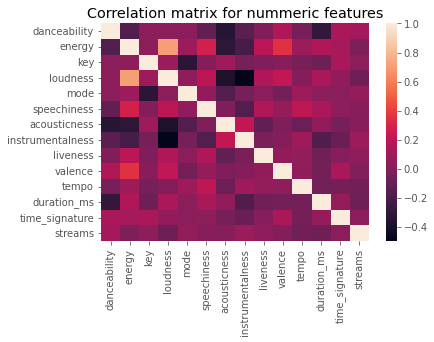

In [34]:
correlation_matrix = audio_features.corr(method='pearson')

sns.heatmap(correlation_matrix , annot=False)
plt.title("Correlation matrix for nummeric features")
plt.show()

In [35]:
audio_features.corr()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,streams
danceability,1.000000,-0.178242,0.029100,0.032279,0.031017,-0.120559,-0.345443,-0.142672,-0.010016,0.153300,-0.038007,-0.296013,0.133481,0.106977
energy,-0.178242,1.000000,0.037528,0.702105,0.085398,0.280141,-0.322117,-0.218727,0.188370,0.350895,0.082905,0.153882,0.119555,-0.021499
key,0.029100,0.037528,1.000000,0.085013,-0.323618,0.000864,0.093093,-0.045463,-0.015069,0.012360,-0.046464,-0.080619,0.133207,0.035947
loudness,0.032279,0.702105,0.085013,1.000000,0.037422,0.202999,-0.383079,-0.498367,0.154682,0.212016,0.004403,0.131362,0.048711,-0.078598
mode,0.031017,0.085398,-0.323618,0.037422,1.000000,0.051211,-0.174662,-0.043293,0.030850,-0.048210,0.088022,0.029782,0.018921,0.052915
speechiness,-0.120559,0.280141,0.000864,0.202999,0.051211,1.000000,-0.007982,-0.180581,0.151070,0.059902,0.205722,0.129460,0.037380,0.011494
acousticness,-0.345443,-0.322117,0.093093,-0.383079,-0.174662,-0.007982,1.000000,0.220556,-0.121862,-0.016686,-0.083848,0.048521,-0.043722,0.016153
instrumentalness,-0.142672,-0.218727,-0.045463,-0.498367,-0.043293,-0.180581,0.220556,1.000000,-0.025720,0.003580,0.090372,-0.187113,-0.093695,0.085257
liveness,-0.010016,0.188370,-0.015069,0.154682,0.030850,0.151070,-0.121862,-0.025720,1.000000,0.049947,0.052634,-0.070486,0.009881,0.041760
valence,0.153300,0.350895,0.012360,0.212016,-0.048210,0.059902,-0.016686,0.003580,0.049947,1.000000,0.045759,-0.057563,0.137270,-0.001715
